<a href="https://colab.research.google.com/github/nikhi-max/lab-activity-1/blob/main/ML_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from google.colab import files
files.upload()


Saving insect.csv to insect.csv


{'insect.csv': b'color,legs,height,smell,species\nwhite,3,short,yes,No Harm\ngreen,2,tall,no,No Harm\ngreen,3,short,yes,No Harm\nwhite,3,short,yes,No Harm\ngreen,2,short,no,Harmful\nwhite,2,tall,no,Harmful\nwhite,2,tall,no,Harmful\nwhite,2,short,yes,Harmful\n'}

In [ ]:
import pandas as pd

# Example path to the uploaded dataset (replace with your actual file path)
file_path = '/content/insect.csv'

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to verify it's loaded correctly
print(df.head())


   color  legs height smell  species
0  white     3  short   yes  No Harm
1  green     2   tall    no  No Harm
2  green     3  short   yes  No Harm
3  white     3  short   yes  No Harm
4  green     2  short    no  Harmful


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load the dataset into a Pandas DataFrame
file_path = '/content/insect.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to verify it's loaded correctly
print(df.head())

# Encode categorical variables to numeric values
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column is categorical
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le  # Store the encoder for possible inverse transformation

# Assuming the last column is the target variable and the rest are features
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model on the training data
gnb.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = gnb.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


   color  legs height smell  species
0  white     3  short   yes  No Harm
1  green     2   tall    no  No Harm
2  green     3  short   yes  No Harm
3  white     3  short   yes  No Harm
4  green     2  short    no  Harmful
Accuracy: 0.50


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load the dataset into a Pandas DataFrame
file_path = '/content/insect.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to verify it's loaded correctly
print(df.head())

# Encode categorical variables to numeric values
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column is categorical
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le  # Store the encoder for possible inverse transformation

# Assuming the last column is the target variable and the rest are features
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
dtc = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dtc.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = dtc.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


   color  legs height smell  species
0  white     3  short   yes  No Harm
1  green     2   tall    no  No Harm
2  green     3  short   yes  No Harm
3  white     3  short   yes  No Harm
4  green     2  short    no  Harmful
Accuracy: 0.50


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import numpy as np

# Load the dataset into a Pandas DataFrame
file_path = '/content/insect.csv'
df = pd.read_csv(file_path)

# Encode categorical variables to numeric values
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column is categorical
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le  # Store the encoder for possible inverse transformation

# Assuming the last column is the target variable and the rest are features
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

# Initialize classifiers
gnb = GaussianNB()
dtc = DecisionTreeClassifier(random_state=42)

# Lists to store accuracies
gnb_accuracies = []
dtc_accuracies = []

# Perform 10 random train-test splits and calculate accuracies
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Gaussian Naive Bayes
    gnb.fit(X_train, y_train)
    y_pred_gnb = gnb.predict(X_test)
    gnb_accuracy = accuracy_score(y_test, y_pred_gnb)
    gnb_accuracies.append(gnb_accuracy)

    # Decision Tree
    dtc.fit(X_train, y_train)
    y_pred_dtc = dtc.predict(X_test)
    dtc_accuracy = accuracy_score(y_test, y_pred_dtc)
    dtc_accuracies.append(dtc_accuracy)

# Compare the accuracies
comparison_df = pd.DataFrame({
    'Split': np.arange(1, 11),
    'Naive Bayes Accuracy': gnb_accuracies,
    'Decision Tree Accuracy': dtc_accuracies
})

print(comparison_df)
print("\nAverage Naive Bayes Accuracy:", np.mean(gnb_accuracies))
print("Average Decision Tree Accuracy:", np.mean(dtc_accuracies))


   Split  Naive Bayes Accuracy  Decision Tree Accuracy
0      1                   1.0                     1.0
1      2                   0.5                     0.5
2      3                   0.5                     0.5
3      4                   0.5                     0.5
4      5                   0.0                     0.0
5      6                   0.5                     0.5
6      7                   1.0                     1.0
7      8                   1.0                     1.0
8      9                   0.5                     0.5
9     10                   0.0                     0.0

Average Naive Bayes Accuracy: 0.55
Average Decision Tree Accuracy: 0.55


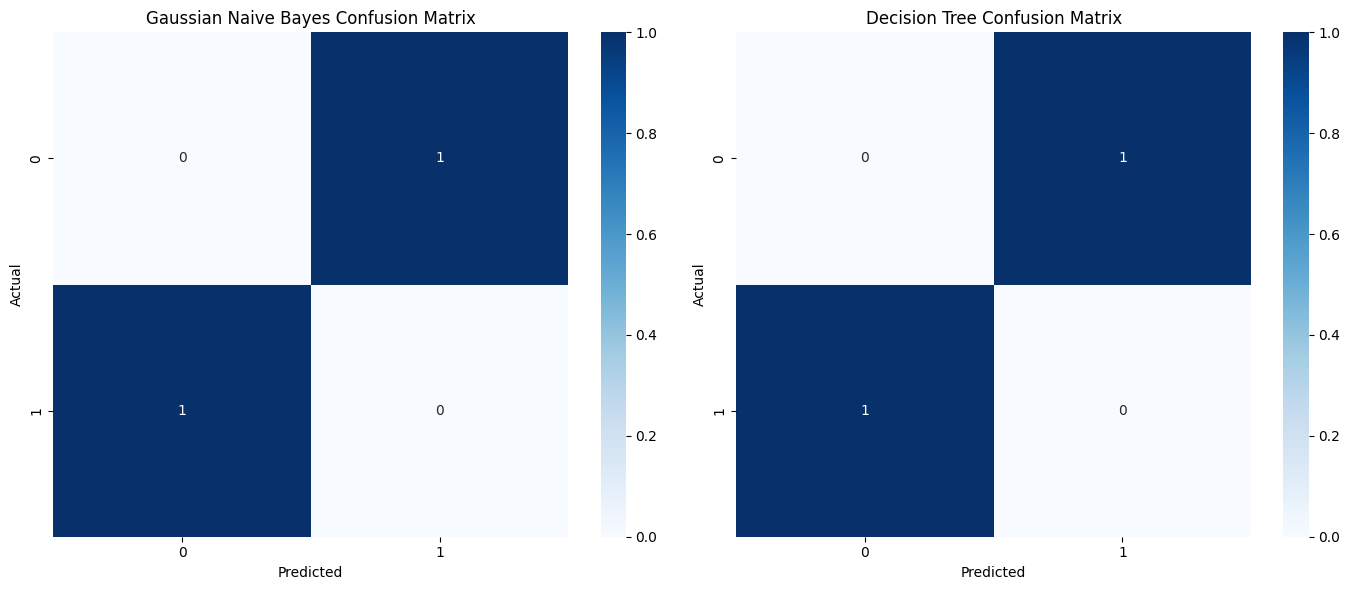

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrices for both classifiers on the last split
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
conf_matrix_dtc = confusion_matrix(y_test, y_pred_dtc)

# Plotting the confusion matrix for Gaussian Naive Bayes
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_gnb, annot=True, fmt='d', cmap='Blues')
plt.title('Gaussian Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plotting the confusion matrix for Decision Tree
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_dtc, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()
